
# 4. Seaborn
---

<img style="position: absolute; top: 15px; right: 110px; border-radius: 5px;" src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" width="140px" />
<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 15px; right: 40px; border-radius: 5px;" />
</div>

<div style="display: flex; justify-content: space-around">
<a href=https://seaborn.pydata.org/examples/scatterplot_matrix.html>
<img src="https://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png" height="135" width="135">
</a>

<a href=https://seaborn.pydata.org/examples/errorband_lineplots.html>
<img src="https://seaborn.pydata.org/_static/errorband_lineplots_thumb.png" height="135" width="135">
</a>


<a href=https://seaborn.pydata.org/examples/many_facets.html>
<img src="https://seaborn.pydata.org/_static/many_facets_thumb.png" height="135" width="135">
</a>

<a href=https://seaborn.pydata.org/examples/structured_heatmap.html>
<img src="https://seaborn.pydata.org/_static/structured_heatmap_thumb.png" height="135" width="135">
</a>

<a href=https://seaborn.pydata.org/examples/horizontal_boxplot.html>
<img src="https://seaborn.pydata.org/_static/horizontal_boxplot_thumb.png" height="135" width="135">
</a>
</div>

<br>

[Seaborn](https://seaborn.pydata.org/) é uma biblioteca de visualização de dados Python baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

## Antes de tudo

### Instalação

Se você tem o Anaconda instalado, você provavelmente já possui o Seaborn instalado.

Para checar, rode o seguinte comando no Jupyter Notebook ou interpretador do python:

```python
import seaborn
```

Se não der erro, é porque está tudo ok!

Caso você tenha um erro, será necessário instalar a biblioteca. Para isso, rode o seguinte comando no prompt/terminal de comando:

```
pip install seaborn
```

Em caso de problemas nessa parte, entre em contato no chat da sua turma ou no Q&A.

### Importando a biblioteca

Assim como importamos pandas como pd e numpy como np, existe uma convenção de se importar  seaborn como sns, como mostrado abaixo:

In [46]:
pip install -U seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn

plt.style.use('seaborn') # Definindo o tema do seaborn

In [48]:
# Verificando a versão da biblioteca do Seaborn
sns.__version__

'0.11.2'

## API

Sendo uma biblioteca construída como uma casa envolta do matplotlib, **tudo que aprendemos sobre matplotlib se aplica aqui** em termos de conceitos (*Figure*, *Axes*, *labels* dos eixos, etc). Porém, o seaborn abstrai para o usuário da biblioteca algumas complexidades, tendo uma excelente integração com DataFrames do pandas.

Como mostra a [documentação da sua API](https://seaborn.pydata.org/api.html), ela é separada em 9 grupos, como mostra a lista a seguir:

- Gráficos relacionais
    - gráficos básicos, exemplos: dispersão e linha
- Categóricos
    - exemplo: gráfico de barras, diagrama de caixa
- Distribuição
    - exemplo: gráfico de distribuição
- Regressão:
    - exemplo regressão linear
- Matriz
    - exemplo: mapa de calor
- Multi-gráfico
    - exemplo: pairplot, jointplot, para múltiplos gráficos em 1 passo
- Controle de estilo
    - exemplos: set, set_style para configurar estilos
- Paleta de cores
    - exemplos: dark_pallete, light_pallete para configurar as cores utilizadas
- Utilitários
    - load_dataset: carregar dados para exemplos
    
Veremos agora as funções mais comumente utilizadas do Seaborn. 

## Análise dos dados

Antes de começar, vamos dar uma olhada nos dados que iremos utilizar em boa parte dos exemplos: um *dataset* de gorjetas ou *tips*.

Iremos utilizar a função utilitária que vem com o seaborn, a <span style="font-family:monospace;">load_dataset</span>, para carregar os dados, que já é um DataFrame:

In [49]:
# Carregando o dataset tips de dentro da própria biblioteca do Seaborn (por meio do método load_dataset)
df = sns.load_dataset('tips')

In [50]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [52]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [53]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

## Aplicando sobre gráficos que criamos com o Matplotlib

Para iniciar, vamos obter um gráfico que nos mostre qual é a receita média diária do restaurante, em cada dia da semana.

### Utilizando o Matplotlib

In [54]:
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


**1º passo: agrupar os dados pelo dia da semana**

In [55]:
df_group_day = df.groupby('day', as_index=False).mean()

df_group_day

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


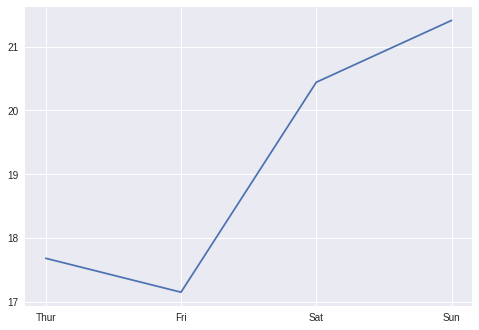

In [56]:
plt.plot(df_group_day['day'], df_group_day['total_bill'])

<BarContainer object of 4 artists>

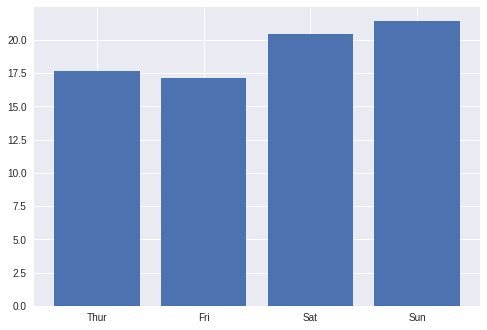

In [57]:
plt.bar(df_group_day['day'], df_group_day['total_bill'])

### Lineplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

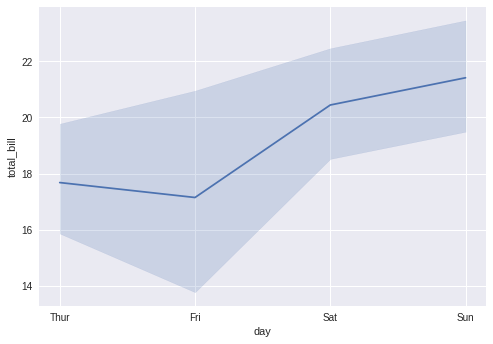

In [104]:
# Gráfico de linha que exibe a média (por padrão) do valor que foi pago por cada pessoa, em cada dia da semana
sns.lineplot(data=df, x='day', y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

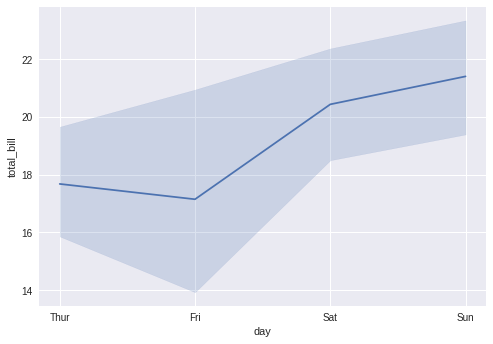

In [59]:
# O estimator, por default, é o mean, ou seja, ele calcula a média dentre os valores que são comuns no eixo x (day)
sns.lineplot(data=df, x='day', y='total_bill', estimator='mean')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

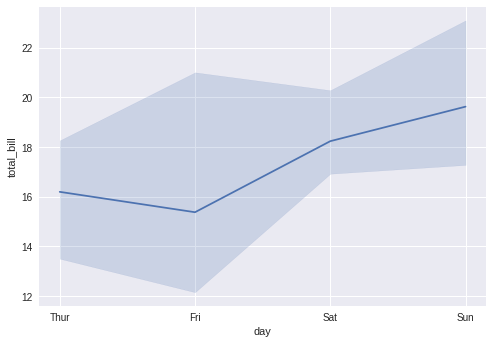

In [105]:
# Utilizando a mediana como estimador
sns.lineplot(data=df, x='day', y='total_bill', estimator=np.median)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

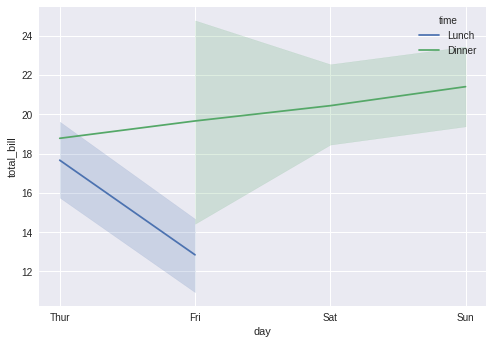

In [106]:
# Separando os dados pelo horário (time), utilizando o parâmetro hue
sns.lineplot(data=df, x='day', y='total_bill', hue='time')

### Scatterplot

Gráfico de dispersão.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

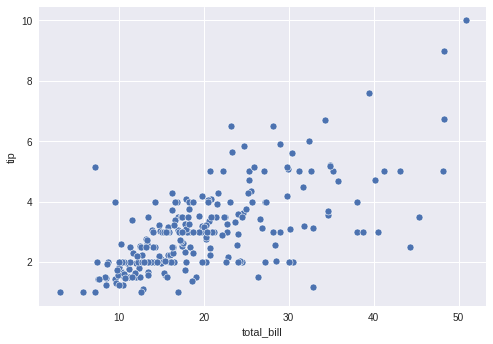

In [72]:
sns.scatterplot(data=df, x='total_bill', y='tip')

### Barplot

Gráfico de barras.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

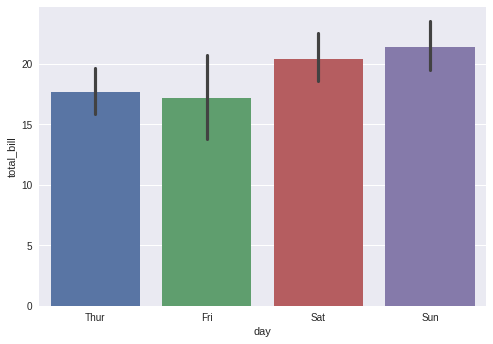

In [62]:
sns.barplot(data=df, x='day', y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

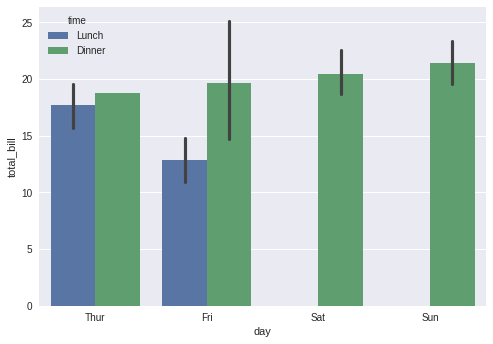

In [63]:
sns.barplot(data=df, x='day', y='total_bill', hue='time')

In [64]:
# Como só temos um dado referente ao jantar na quinta, não há a informação da dispersão no gráfico
df[(df['day'] == 'Thur') & (df['time'] == 'Dinner')]

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2


<AxesSubplot:xlabel='day', ylabel='total_bill'>

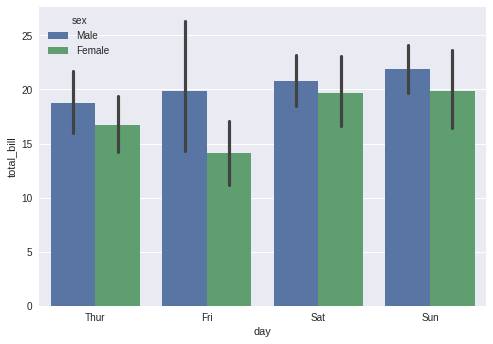

In [108]:
# Separando as barras pelo sexo (sex), utilizando o hue
sns.barplot(data=df, x='day', y='total_bill', hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

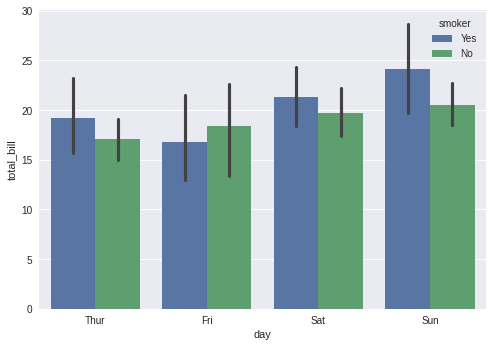

In [66]:
sns.barplot(data=df, x='day', y='total_bill', hue='smoker')

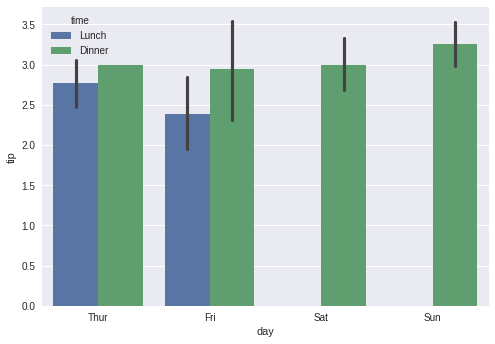

In [67]:
ax = sns.barplot(x='day', y='tip', data=df, hue='time')

<AxesSubplot:xlabel='day', ylabel='tip'>

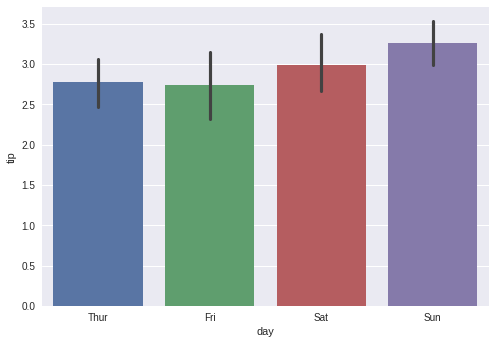

In [73]:
# Gráfico de barras: tip x day
sns.barplot(data=df, x='day', y='tip')

### Combinando funções do Matplotlib com o Seaborn

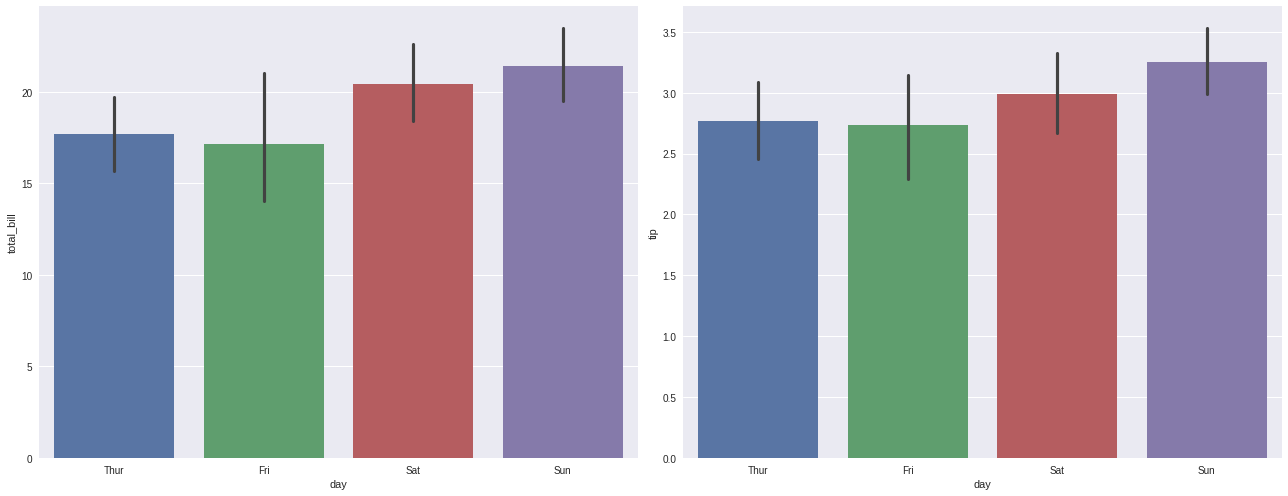

In [75]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='day', y='total_bill')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='day', y='tip')

plt.tight_layout()

### Adicionando os labels dos valores do plot

> https://matplotlib.org/stable/api/container_api.html#matplotlib.container.BarContainer  
> https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html

In [68]:
ax.containers

[<BarContainer object of 4 artists>, <BarContainer object of 4 artists>]

In [69]:
for container in ax.containers:
  ax.bar_label(container)

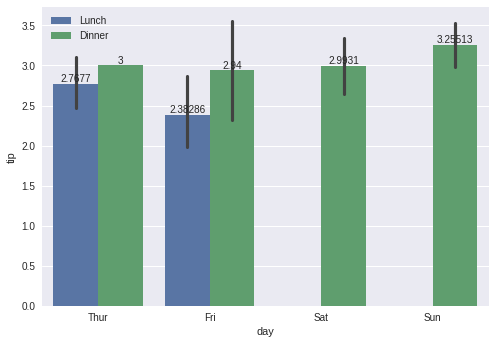

In [71]:
ax = sns.barplot(x='day', y='tip', data=df, hue='time')
for container in ax.containers:
  ax.bar_label(container)

plt.legend(loc='upper left')

## 1. Gráfico de Distribuição
---

### 1.1. `histplot`/`displot`

In [88]:
random_normal_numbers = np.random.randn(10000)
# Gerando 10000 números aleatórios seguindo uma distribuição normal padrão (média = 0, desvio padrão = 1)

<AxesSubplot:ylabel='Count'>

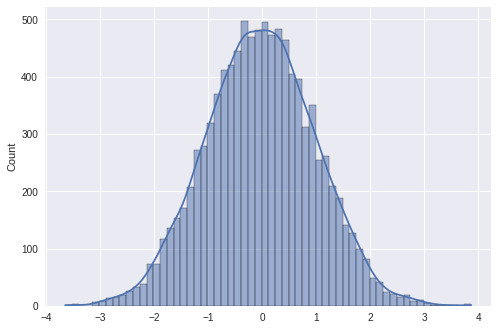

In [89]:
sns.histplot(random_normal_numbers, kde=True)

In [78]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

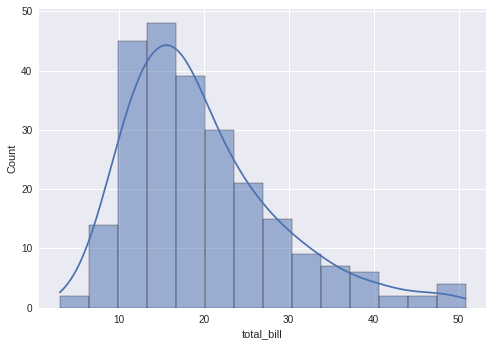

In [82]:
sns.histplot(df['total_bill'], kde=True)

<AxesSubplot:xlabel='tip', ylabel='Count'>

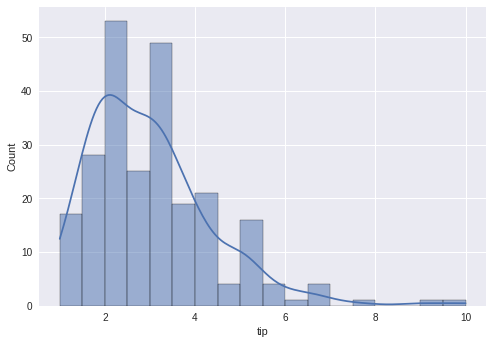

In [84]:
sns.histplot(df['tip'], kde=True)

### stat

<AxesSubplot:xlabel='total_bill', ylabel='Probability'>

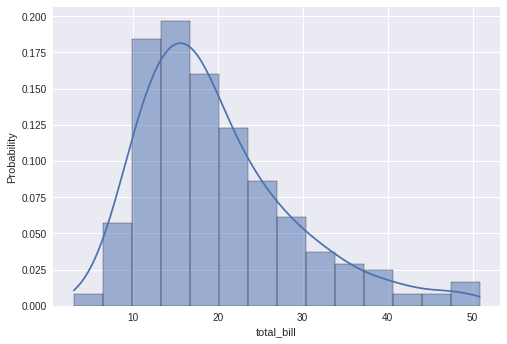

In [93]:
sns.histplot(df['total_bill'], kde=True, stat='probability')

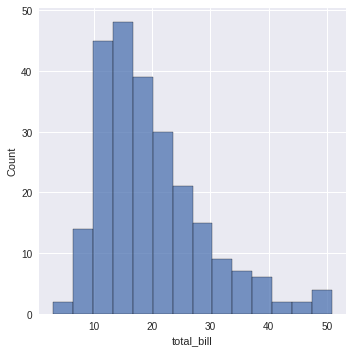

In [91]:
# Alternativa ao histplot
sns.displot(df['total_bill'])

### 1.2. `jointplot`

jointplot() permite combinar basicamente dois distplots() para dados bivariados. Podemos visualizar os dados das seguintes formas (usando o **kind**):
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

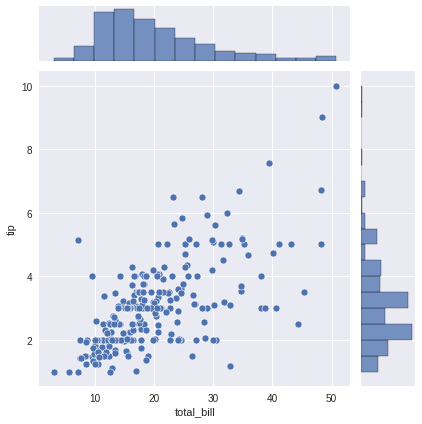

In [96]:
sns.jointplot(data=df, x='total_bill', y='tip')

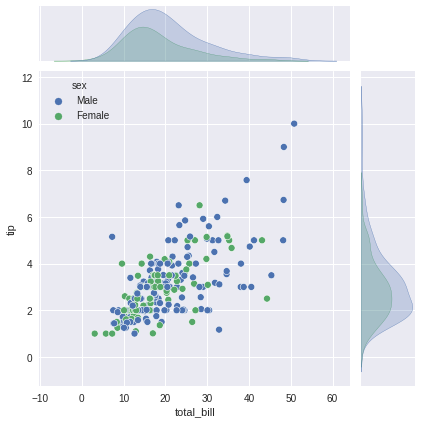

In [97]:
sns.jointplot(data=df, x='total_bill', y='tip', hue='sex')

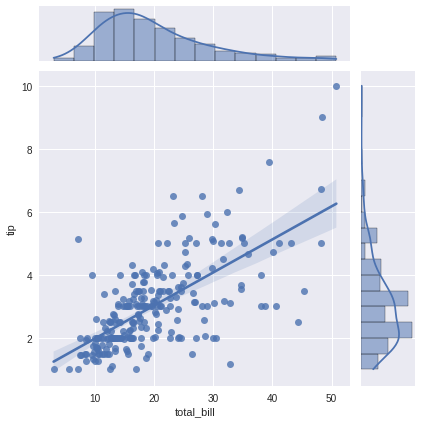

In [99]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='reg')

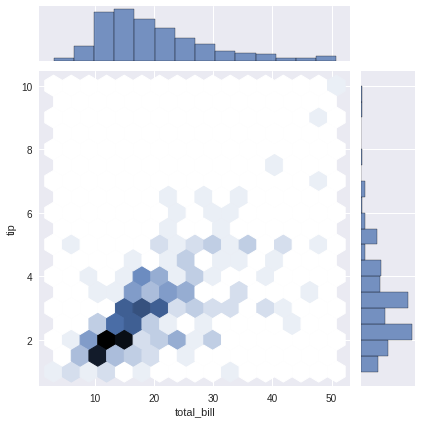

In [100]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='hex')

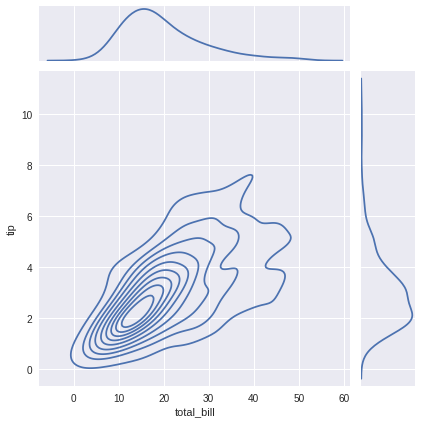

In [101]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='kde')

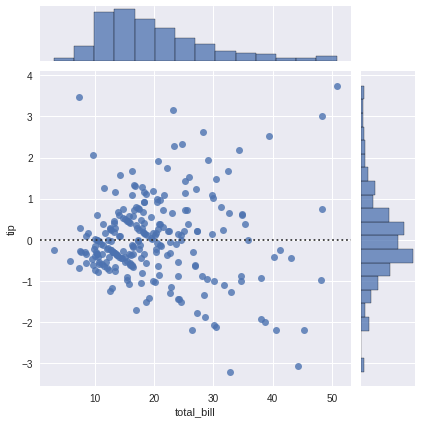

In [103]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='resid')

### 1.3. `pairplot`

O `pairplot` irá traçar distribuições entre pares em todo o DataFrame (para as colunas numéricas) e suporta um argumento de matiz de cor (para colunas categóricas).

### 5. `lmplot`

## 2. Gráficos Categóricos
---

### 2.1. `countplot`

Um gráfico apresentar a contagem de dados. Vamos testar visualizando a contagem de dados relacionados aos dias da semana.

Agora, vamos seperar os dados pelo horário.

### 2.2. `barplot`

Gráfico de barras.

### 2.3. `boxplot`

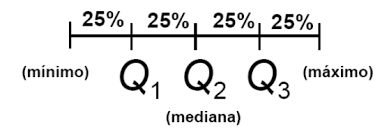

### Intervalo Interquartílico

$$
l_{inf} = Q_1 - 1,5\cdot IQR
$$

$$
l_{sup} = Q_3 + 1,5\cdot IQR
$$

em que,

$$
IQR = Q_3 - Q_1
$$

## 3. Gráficos de Matriz
---

### 3.1. Heatmap

> Mapa de cores: [Documentação](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

## Plotly

A biblioteca Plotly é uma biblioteca do Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, cobrindo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

Construído sobre a biblioteca Plotly JavaScript (plotly.js), o plotly permite que os usuários Python criem belas visualizações interativas baseadas na web que podem ser exibidas em blocos de anotações Jupyter, salvas em arquivos HTML autônomos ou servidas como parte da web puramente construída em Python aplicativos usando o Dash. A biblioteca Plotly do Python é às vezes chamada de "plotly.py" para diferenciá-la da biblioteca JavaScript.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/4f93ab61-2342-4cfe-af1b-1de1a7e87ff4.gif" alt="Plotly examples" style="display: block; margin: 2rem auto; max-width: 700px" />